# Plot figures

### Import libraries 

In [1]:
# libraries
from tifffile import TiffFile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from thunder import Colorize
import seaborn as sns
import fit
import cv2
from scipy.optimize import curve_fit
from copy import copy
from skimage.morphology import erosion
from skimage.morphology import disk
import os
from scipy.ndimage.filters import median_filter
from smooth import smooth
from tifffile import imsave
from PIL import Image

filesep = os.path.sep
image = Colorize.image
%matplotlib inline

/Users/seetha/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/seetha/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load trace
# Get excel file as pandas
import pandas as pd
Data = pd.io.excel.read_excel('/Users/seetha/Desktop/Bleach_Correction/Excitation spectrum.xlsx', sheetname=0)
Data.head()

,wavelength,average intensity
0,760,17584.375
1,780,17301.164
2,800,21462.570
3,820,22177.453
4,840,21912.496


In [3]:
x = Data['wavelength']
columnname = list(Data.columns.values)
columnname_used = columnname[1]
y = Data[columnname_used].as_matrix()

In [4]:
# Get excel file as pandas
Data1 = pd.io.excel.read_excel('/Users/seetha/Desktop/Bleach_Correction/10dpf1b_analysis.xlsx', sheetname=0)
Data1.head()

,Time information,fig. 3D
0,timestamp #0100 = 3.440124047506601,1593.192
1,timestamp #0101 = 3.474654863823205,1577.036
2,timestamp #0102 = 3.5086928489916027,1573.818
3,timestamp #0103 = 3.54273083416,1638.505
4,timestamp #0104 = 3.5767688193283975,1642.418


In [5]:
x1 = Data1['Time information']
x1 = x1.str[18:].convert_objects(convert_numeric=True)
columnname = list(Data1.columns.values)
columnname_used = columnname[1]
y1 = Data1[columnname_used].as_matrix()

/Users/seetha/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


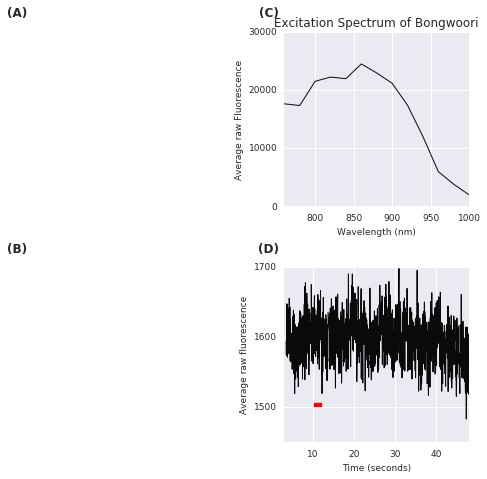

In [6]:
## Figure 3
import plotsettings
import matplotlib.patches as mpatches

publishable = plotsettings.Set('Cell')
publishable.set_figsize(2, 2, aspect_ratio = 1)

fig1 = plt.figure()
fig1.subplots_adjust(hspace=3)

color_mat = ['#00FF00','cyan','#FFFF00','r']
with sns.axes_style('darkgrid'):
    
    ax2 = fig1.add_subplot(2,2,1)
    ax2.axis('off')
    ax2 = fig1.add_subplot(2,2,3)
    ax2.axis('off')
    
    ax2 = fig1.add_subplot(2,2,2)
    ax2.plot(x, y, color='#0C090A', label='raw trace', linewidth=1)           
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average raw Fluorescence')
    plt.title('Excitation Spectrum of Bongwoori')
    ax2.locator_params(axis='y', nbins=4)
    plt.xlim((760,1000)) 
    
    ax2 = fig1.add_subplot(2,2,4)
    ax2.plot(x1, y1, color='#0C090A', label='raw trace', linewidth=1)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Average raw fluorescence')
    ax2.locator_params(axis='y', nbins=4)    
    plt.xlim((3,48))
    plt.ylim((1450,1700))
    art = mpatches.Rectangle([10.27,1500], 2, 5, color = 'r')
    ax2.add_patch(art)
        
publishable.panel_labels(fig = fig1, position = 'outside', case = 'upper',
                         prefix = '(', suffix = ')', fontweight = 'bold', fontsize=12)
    
plt.tight_layout()
plt.show()


Working_Directory = '/Users/seetha/Desktop/Bleach_Correction/'
Save_Directory = os.path.join(Working_Directory, 'Traces_bleach_correction')
if not os.path.exists(Save_Directory):
    os.makedirs(Save_Directory)
fig1.savefig(Save_Directory+filesep+'Figure3.pdf', bbox_inches='tight')